# E2. Merging exercises

## 1. Swedish demographic data (*)
Go to Swedish-language wikipedia page Sveriges demografi.

###  a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [6]:
import pandas as pd
import seaborn as sb


link = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
bef_stat_modern_s= pd.read_html(link, thousands=' ', decimal=',' )[5]
#bef_stat_modern_s[("Folkmängd")] = bef_stat_modern_s[("Folkmängd")].str.replace(' ','').astype(int)
bef_stat_modern_s = bef_stat_modern_s.rename({"Unnamed: 0" : "År"}, axis="columns")

bef_stat_modern_s

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83
...,...,...,...,...,...,...,...,...,...
116,2016,9995000,117425,90982,26443,11.8,9.2,2.6,1.85
117,2017,10120000,115416,91972,23444,11.4,9.1,2.3,1.79
118,2018,10230000,115832,92185,23647,11.3,9.0,2.3,1.75
119,2019,10327589,114523,88766,28727,11.1,8.7,2.4,1.70


### b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

Text(0.5, 0, 'Årtal')

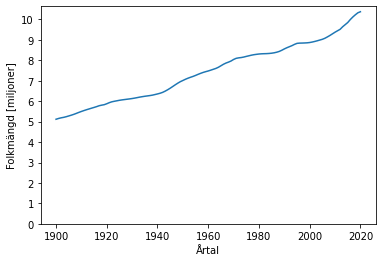

In [7]:
import matplotlib.pyplot as plt


sb.lineplot(data=bef_stat_modern_s, x="År", y="Folkmängd")
plt.yticks([i for i in range(0, int(11e6), int(1e6) )], [f"{i}" for i in range(0, 11)]);
plt.ylabel("Folkmängd [miljoner]")
plt.xlabel("Årtal")






In [8]:
import plotly_express as px
fig = px.line(bef_stat_modern_s, x="År", y="Folkmängd", title="Befolkning i Sverige 1900 till 2020", range_y=[0, 11e6])


fig.show()

### c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [9]:
bef_stat_hist_s = pd.read_html(link, match= "Vid utgången av år", thousands= "\xa0", decimal=",", header=1, skiprows=[12])[0]

bef_stat_hist_s


,Vid utgången av år,Folkmängd,Totalt,Promille
0,1570,900000,—,—
1,1650,1225000,4063,3.86
2,1700,1485000,5200,3.86
3,1720,1350000,−6 750,"−4,75"
4,1755,1878000,15086,9.48
5,1815,2465000,9783,4.54
6,1865,4099000,32680,10.22
7,1900,5140000,29743,6.48
8,2000,8861000,NaN,NaN
9,2020,10379000,NaN,NaN


In [10]:
col = bef_stat_hist_s.columns[0:2]

bef_stat_hist_s = bef_stat_hist_s[col] 
bool_s = bef_stat_hist_s[bef_stat_hist_s.columns[0]] < 1900
bef_stat_hist_s = bef_stat_hist_s[bool_s] 

bef_stat_hist_s = bef_stat_hist_s.rename({col[0] : "År"}, axis="columns")
bef_stat_hist_s


,År,Folkmängd
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000


### d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.


In [11]:
bef_tot_s = pd.concat([bef_stat_hist_s, bef_stat_modern_s], ignore_index=True)
bef_tot_s

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1570,900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1650,1225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1700,1485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720,1350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1755,1878000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
123,2016,9995000,117425.0,90982.0,26443.0,11.8,9.2,2.6,1.85
124,2017,10120000,115416.0,91972.0,23444.0,11.4,9.1,2.3,1.79
125,2018,10230000,115832.0,92185.0,23647.0,11.3,9.0,2.3,1.75
126,2019,10327589,114523.0,88766.0,28727.0,11.1,8.7,2.4,1.70


## e) Draw a graph of population data from 1570-2020.

In [12]:
fig = px.line(bef_tot_s, x="År", y="Folkmängd", title="Befolkning i Sverige 1570 till 2020", range_y=[0, 11e6])


fig.show()